Name: RASINENI KALYANI

USN: 1AJ22CS123

Email id: kalyanichowdary.rasineni@gmail.com

Branch: Computer Science and Engineering

Title of the Project : HEART DISEASE RISK PREDECTION USING MACHINE LEARNING



The aim of this project is:

To build a machine learning system that predicts whether a patient has heart disease using clinical parameters

 HEART DISEASE RISK PREDICTION

Install & Import Libraries

In [ ]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


Load & Analyse the Data

In [ ]:
from google.colab import files
import pandas as pd
uploaded = files.upload()


Saving heart.csv to heart.csv


In [ ]:
# Load Kaggle heart disease dataset CSV file
df = pd.read_csv("heart.csv")

In [ ]:
# Display first 5 rows to understand structure
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# Print dataset shape (rows, columns)
print("\nDataset shape:", df.shape)


Dataset shape: (918, 12)


In [ ]:
# Print column data types and null info
print("\nDataset info:")
print(df.info())



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


Average patient age ≈ 54 years
Dataset mostly contains middle-aged and elderly
Good for heart disease prediction since risk increases with age

Normal BP ≈ 120
Mean is slightly high → many patients hypertensive

Healthy cholesterol ≈ < 200
Average is borderline
Very high std → strong variability

0 = normal sugar
1 = high sugar
Only ~23% have high fasting sugar

Maximum heart rate varies widely across patients and contributes significantly to risk prediction.

Oldpeak shows a broad distribution, indicating varied ECG stress responses among patients.

0 = No disease
1 = Disease
~55% patients have heart disease
Dataset is fairly balanced


In [ ]:
# Statistical summary of numerical columns
print("\nStatistical summary:")
print(df.describe())


Statistical summary:
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [ ]:
# Check target class distribution
print("\nTarget class distribution:")
df['HeartDisease'].value_counts().to_frame()




Target class distribution:


,count
HeartDisease,
1,508
0,410


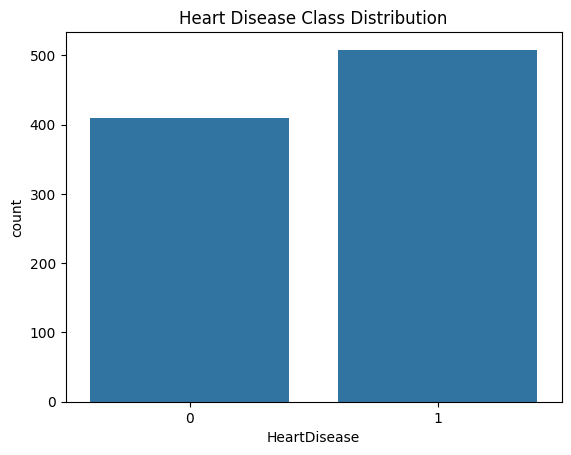

In [ ]:
# Target variable distribution
sns.countplot(x='HeartDisease', data=df)
plt.title("Heart Disease Class Distribution")
plt.show()

Missing Value Analysis

Check Missing Values

In [ ]:
# Count missing values column-wise
print("\nMissing values :")
print(df.isnull().sum())


Missing values :
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Encode Categorical Columns

In [ ]:
# Save object columns BEFORE encoding
object_cols = df.select_dtypes(include=['object']).columns

print("Categorical Columns:")
print(object_cols)


Categorical Columns:
Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [ ]:
# List of categorical columns in Kaggle heart dataset
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Create label encoder object
le = LabelEncoder()

# Convert each categorical column into numeric form
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

EDA & Data Visualization

EDA — UNIVARIATE

Univariate Analysis:

Univariate analysis was performed to understand the distribution of individual variables such as age, cholesterol, resting blood pressure, and heart disease status using histograms and count plots.

Histogram Shows:

Distribution of values

Skewness

Frequency

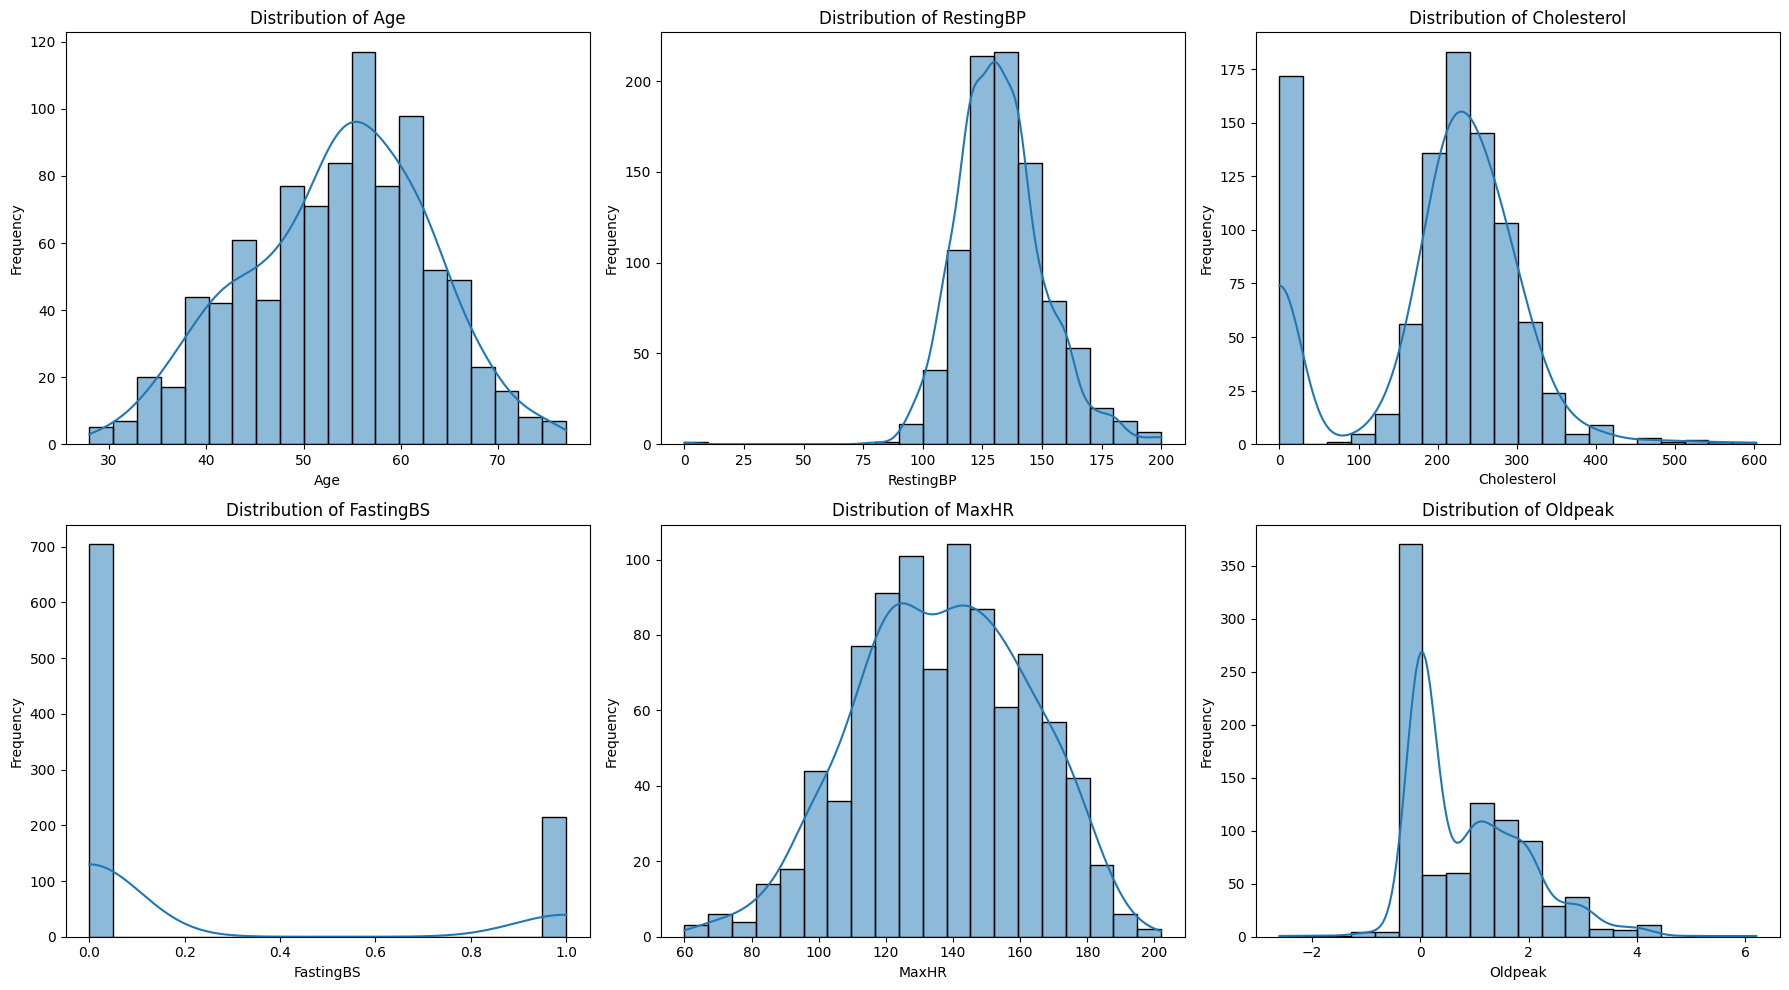

In [ ]:
# ============================================================
# UNIVARIATE ANALYSIS
# ============================================================

# List of important numerical features
univariate_cols = ['Age', 'RestingBP', 'Cholesterol',
                   'FastingBS', 'MaxHR', 'Oldpeak']

# Plot 3 graphs per row
n_cols = 3
n_rows = int(np.ceil(len(univariate_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(univariate_cols):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Remove extra empty plots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


 8. EDA — MULTIVARIATE

Multivariate Analysis:

Multivariate analysis was carried out to study the relationship between multiple features and the target variable using box plots, scatter plots, correlation heatmaps, and pair plots.

Boxplot helps to visualize distribution, median, spread and outliers of features across heart disease classes. It clearly shows which features have significant variation between diseased and non-diseased patients.

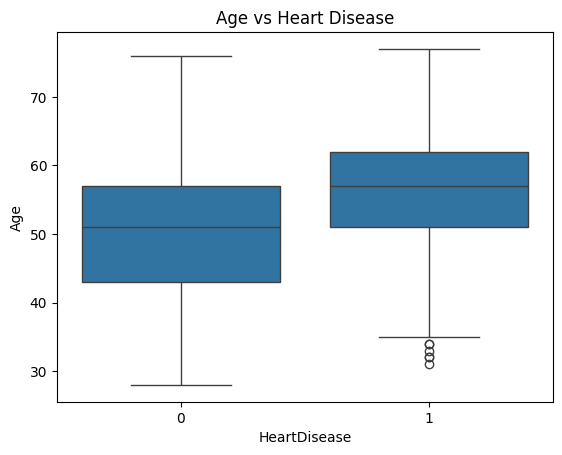

In [ ]:
# Age vs Heart Disease relationship
sns.boxplot(x='HeartDisease', y='Age', data=df)
plt.title("Age vs Heart Disease")
plt.show()

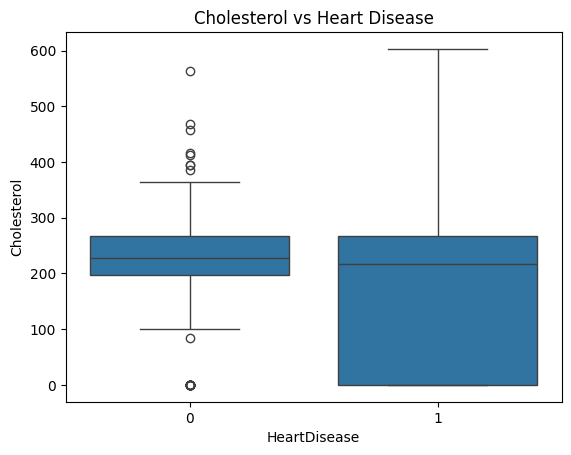

In [ ]:
# Cholesterol vs Heart Disease
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df)
plt.title("Cholesterol vs Heart Disease")
plt.show()

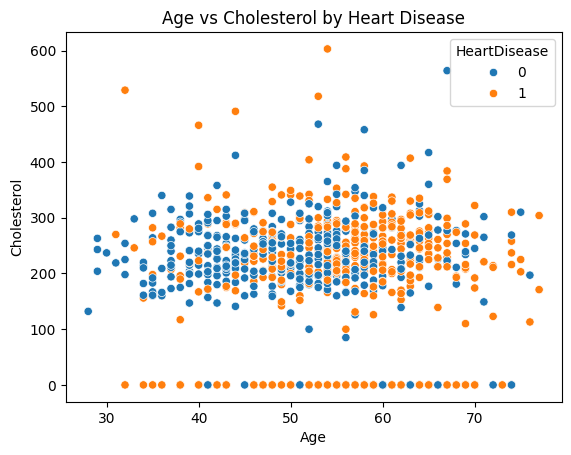

In [ ]:
# Scatter plot: Age vs Cholesterol colored by disease
sns.scatterplot(x='Age', y='Cholesterol',
                hue='HeartDisease',
                data=df)
plt.title("Age vs Cholesterol by Heart Disease")
plt.show()

“Pairplot is used for multivariate analysis to visualize relationships between multiple features simultaneously. It helps identify correlation patterns, class separation, and feature distributions across heart disease risk classes.”

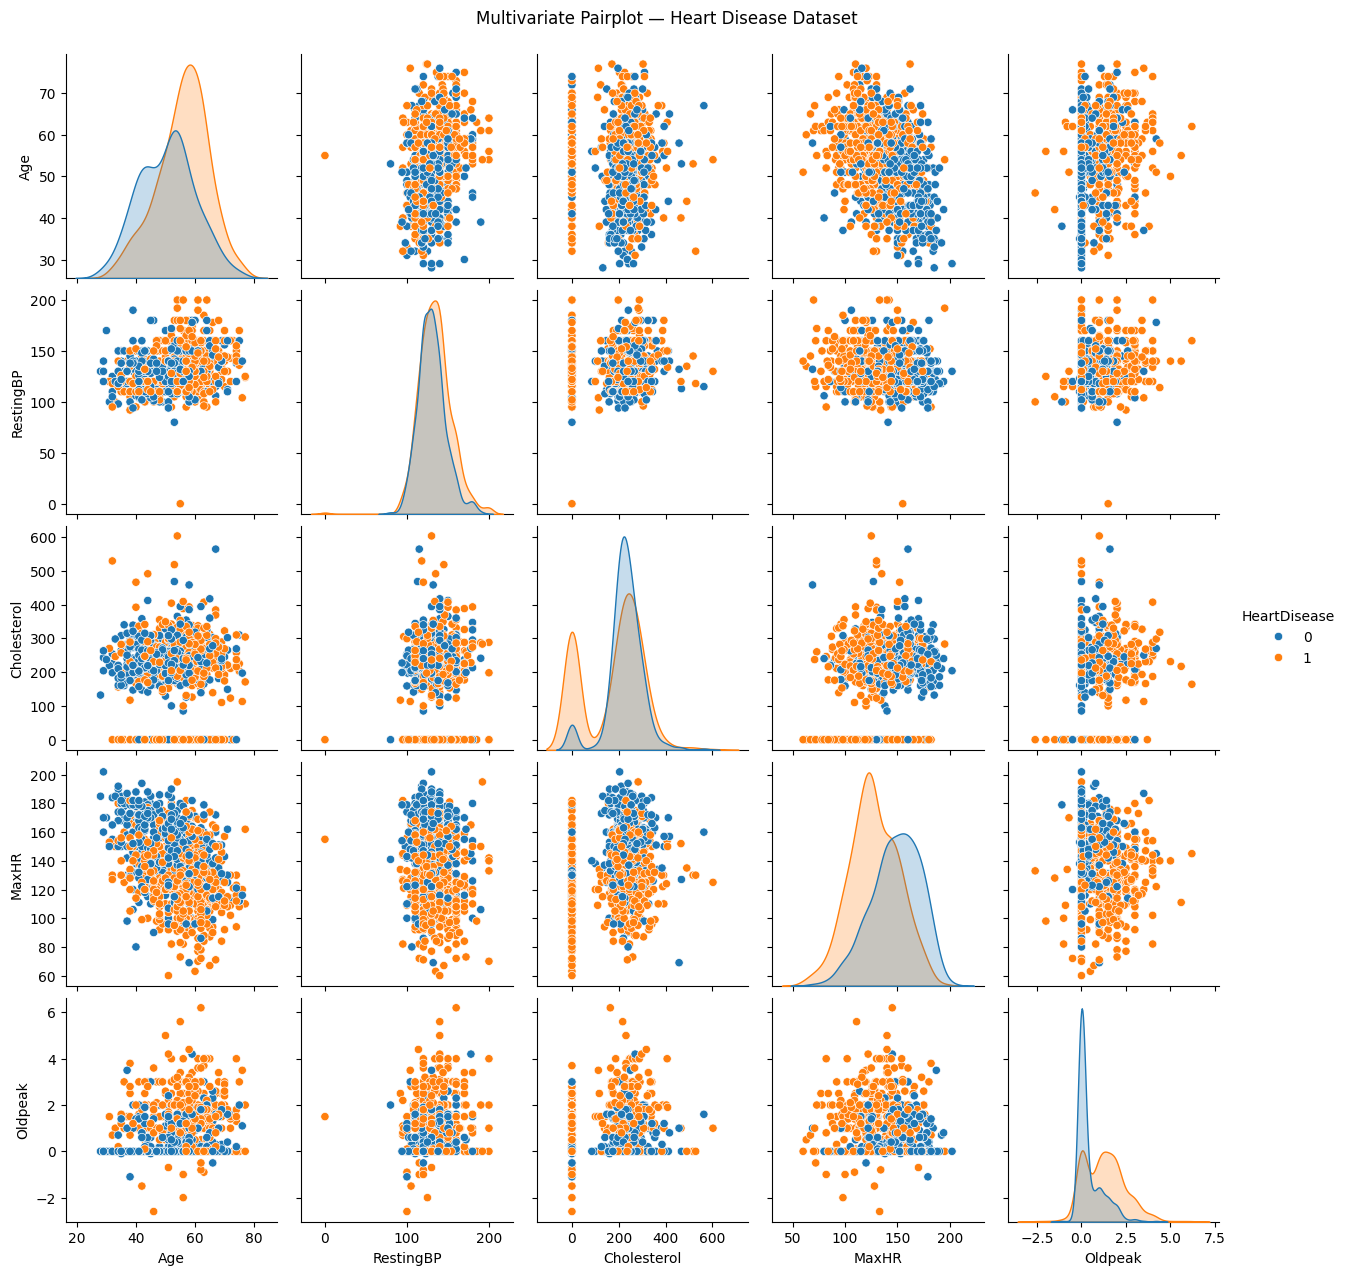

In [ ]:
# Select key numeric columns for multivariate pairplot
pairplot_cols = [
    'Age',
    'RestingBP',
    'Cholesterol',
    'MaxHR',
    'Oldpeak',
    'HeartDisease'
]

# Create pairplot
sns.pairplot(
    df[pairplot_cols],
    hue='HeartDisease',      # color by target class
    diag_kind='kde'          # smooth distribution on diagonal
)

plt.suptitle("Multivariate Pairplot — Heart Disease Dataset", y=1.02)
plt.show()

| Pattern                  | Meaning                     |
| ------------------------ | --------------------------- |
| Low MaxHR + High Oldpeak | Strong indicator of disease |
| Higher Age               | Increased risk              |
| High Cholesterol alone   | Not strongly predictive     |
| Heavy overlap in BP      | Weak separation             |


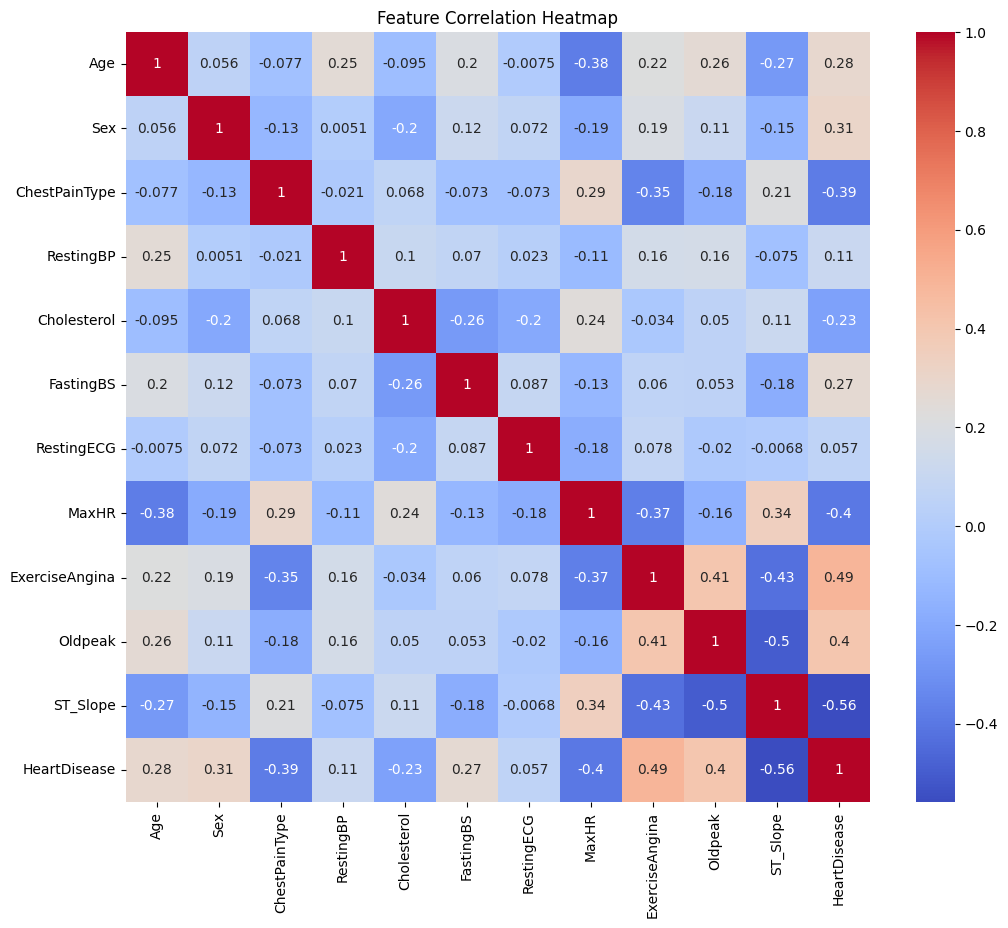

In [ ]:
# Correlation heatmap for all features
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

| Feature       | Correlation | Meaning                               |
| ------------- | ----------- | ------------------------------------- |
| ChestPainType | -0.39       | Some chest pain types strongly linked |
| Sex           | +0.31       | Males more likely                     |
| Age           | +0.28       | Risk increases with age               |
| FastingBS     | +0.27       | Slight association                    |
| Cholesterol   | -0.23       | Weak negative                         |


| Feature    | Correlation |
| ---------- | ----------- |
| RestingBP  | 0.11        |
| RestingECG | 0.057       |


Prepare Data for Modeling

In [ ]:
# Separate features and target column
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Split into training and testing data (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

 REGRESSION MODELS

Linear Regression

In [ ]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print("\nLinear Regression R2:", lin_reg.score(X_test, y_test))


Linear Regression R2: 0.4358397138678326


Ridge Regression

In [ ]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print("Ridge Regression R2:", ridge.score(X_test, y_test))

Ridge Regression R2: 0.4358394489496705


Lasso Regression

In [ ]:
# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
print("Lasso Regression R2:", lasso.score(X_test, y_test))

Lasso Regression R2: 0.4241022773074309


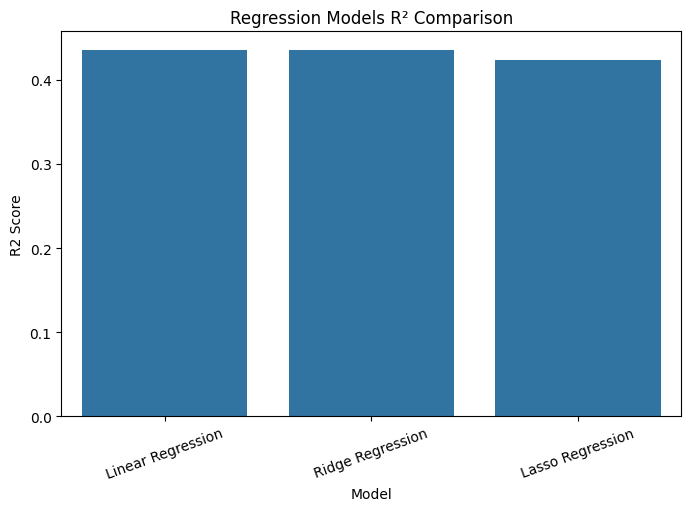

In [ ]:
# ==========================================
# Plot R² Score Comparison
# ==========================================

# Create a DataFrame to store R2 scores
reg_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'R2 Score': [
        lin_reg.score(X_test, y_test),
        ridge.score(X_test, y_test),
        lasso.score(X_test, y_test)
    ]
})

plt.figure(figsize=(8,5))

sns.barplot(x="Model", y="R2 Score", data=reg_results)

plt.title("Regression Models R² Comparison")
plt.xticks(rotation=20)
plt.show()

CONVENTIONAL CLASSIFICATION

Logistic Regression


Model: Logistic Regression
Accuracy: 0.842391304347826
Confusion Matrix:
 [[68  9]
 [20 87]]
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        77
           1       0.91      0.81      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



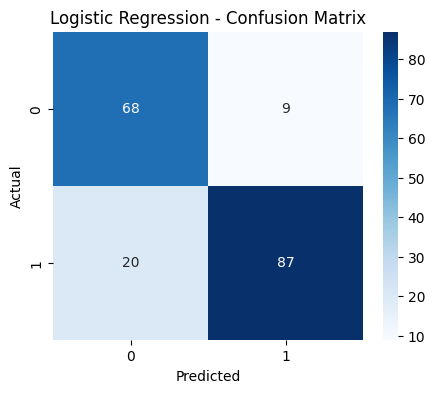

In [ ]:
# ==================================
# Logistic Regression
# ==================================

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

name = "Logistic Regression"

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

pred = model.predict(X_test)

print("\nModel:", name)
print("Accuracy:", accuracy_score(y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

# Heatmap
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"{name} - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


|          | Predicted 0 | Predicted 1 |
| -------- | ----------- | ----------- |
| Actual 0 | TN          | FP          |
| Actual 1 | FN          | TP          |

Meaning:

TP → Correct disease detection
TN → Correct healthy detection
FP → False alarm
FN → Missed disease (dangerous)

In medical problems:
Minimizing FN is very important.

KNN Classifier


Model: KNN
Accuracy: 0.7010869565217391
Confusion Matrix:
 [[55 22]
 [33 74]]
              precision    recall  f1-score   support

           0       0.62      0.71      0.67        77
           1       0.77      0.69      0.73       107

    accuracy                           0.70       184
   macro avg       0.70      0.70      0.70       184
weighted avg       0.71      0.70      0.70       184



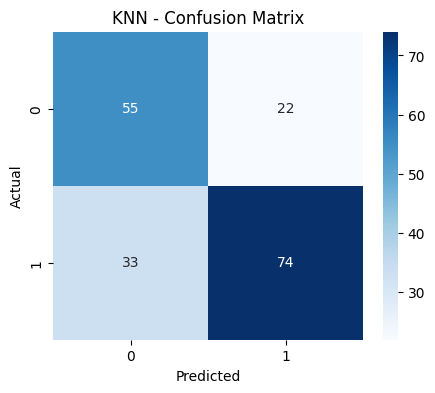

In [ ]:
# ==================================
# KNN Classifier
# ==================================

from sklearn.neighbors import KNeighborsClassifier

name = "KNN"

model = KNeighborsClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)

print("\nModel:", name)
print("Accuracy:", accuracy_score(y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"{name} - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Decision Tree


Model: Decision Tree
Accuracy: 0.8043478260869565
Confusion Matrix:
 [[65 12]
 [24 83]]
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        77
           1       0.87      0.78      0.82       107

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.80      0.81       184



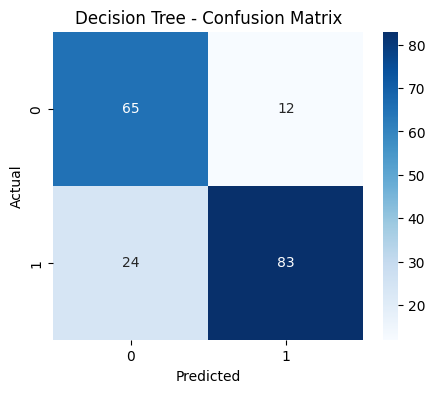

In [ ]:
# ==================================
# Decision Tree
# ==================================

from sklearn.tree import DecisionTreeClassifier

name = "Decision Tree"

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)

print("\nModel:", name)
print("Accuracy:", accuracy_score(y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"{name} - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Random Forest


Model: Random Forest
Accuracy: 0.8695652173913043
Confusion Matrix:
 [[67 10]
 [14 93]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        77
           1       0.90      0.87      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



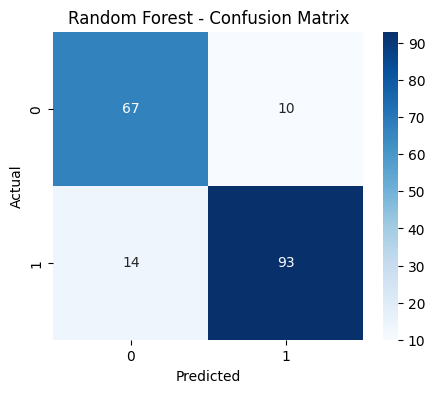

In [ ]:
# ==================================
# Random Forest
# ==================================

from sklearn.ensemble import RandomForestClassifier

name = "Random Forest"

model = RandomForestClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)

print("\nModel:", name)
print("Accuracy:", accuracy_score(y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"{name} - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Support Vector Machine


Model: SVM
Accuracy: 0.6847826086956522
Confusion Matrix:
 [[54 23]
 [35 72]]
              precision    recall  f1-score   support

           0       0.61      0.70      0.65        77
           1       0.76      0.67      0.71       107

    accuracy                           0.68       184
   macro avg       0.68      0.69      0.68       184
weighted avg       0.69      0.68      0.69       184



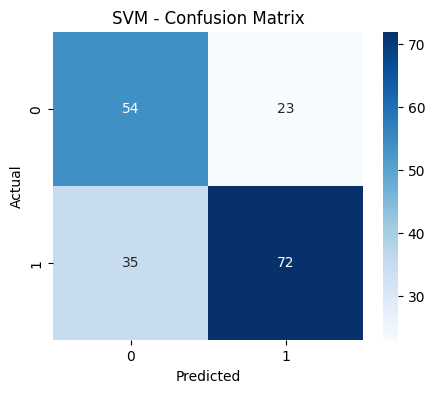

In [ ]:
# ==================================
# Support Vector Machine
# ==================================

from sklearn.svm import SVC

name = "SVM"

model = SVC()
model.fit(X_train, y_train)

pred = model.predict(X_test)

print("\nModel:", name)
print("Accuracy:", accuracy_score(y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"{name} - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Random Forest

Handles non-linearity

Reduces overfitting

Good with mixed features

NEURAL NETWORK

In [ ]:
# ==========================================
# Feature Scaling (Required for ANN)
# ==========================================

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# ==========================================
# Build Neural Network
# ==========================================

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ann = Sequential()

# Input Layer + Hidden Layer 1
ann.add(Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))

# Hidden Layer 2
ann.add(Dense(16, activation='relu'))

# Output Layer
ann.add(Dense(1, activation='sigmoid'))

# Compile Model
ann.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# ==========================================
# Train Model
# ==========================================

history = ann.fit(
    X_train_scaled,
    y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6170 - loss: 0.6301 - val_accuracy: 0.7823 - val_loss: 0.5303
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8274 - loss: 0.4796 - val_accuracy: 0.8231 - val_loss: 0.4637
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8034 - loss: 0.4475 - val_accuracy: 0.8299 - val_loss: 0.4370
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8498 - loss: 0.3878 - val_accuracy: 0.8299 - val_loss: 0.4185
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8381 - loss: 0.3898 - val_accuracy: 0.8299 - val_loss: 0.4084
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8662 - loss: 0.3151 - val_accuracy: 0.8231 - val_loss: 0.3999
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8599 - loss: 0.3266 - val_accuracy: 0.8231 - val_loss: 0.3931
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8706 - loss: 0.3234 - val_accuracy: 0.8231 - val_loss:

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8539 - loss: 0.3767 
Neural Network Accuracy: 0.8804348111152649
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


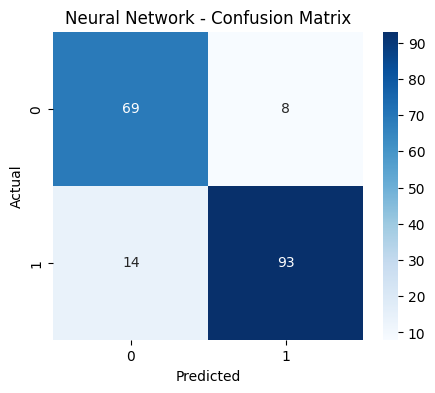


Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        77
           1       0.92      0.87      0.89       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [ ]:
# ==========================================
# Evaluate Neural Network
# ==========================================

loss, accuracy = ann.evaluate(X_test_scaled, y_test)

print("Neural Network Accuracy:", accuracy)

# Predictions
y_pred_prob = ann.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Neural Network - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


TRAINING CURVE

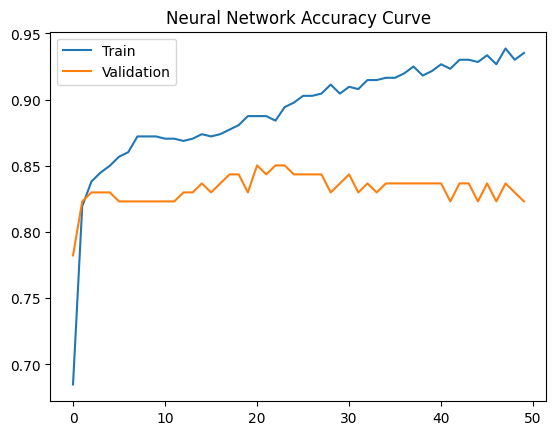

In [ ]:
# Plot training vs validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train', 'Validation'])
plt.title("Neural Network Accuracy Curve")
plt.show()

In [ ]:
!pip install gradio


In [ ]:
# ==========================================
# Train Final Model for Deployment
# ==========================================

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import joblib

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train model
final_model = RandomForestClassifier()
final_model.fit(X_scaled, y)

# Save model and scaler
joblib.dump(final_model, "heart_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model trained and saved successfully.")


Model trained and saved successfully.


In [ ]:
!pip install reportlab


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.4 MB/s eta 0:00:00


In [ ]:
# =========================================================
# 🏥 ENTERPRISE HEART DISEASE RISK PREDICTION PLATFORM
# =========================================================

import gradio as gr
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer
from reportlab.lib.styles import getSampleStyleSheet

# =========================================================
# MODEL SETUP (Demo Model)
# =========================================================

model = LogisticRegression()
model.classes_ = np.array([0, 1])

class DummyScaler:
    def transform(self, x):
        return x

scaler = DummyScaler()

background = np.random.normal(size=(50, 11))
y_dummy = np.random.randint(0, 2, size=50)
model.fit(background, y_dummy)

explainer = shap.LinearExplainer(model, background)

# =========================================================
# 🔐 LOGIN SYSTEM
# =========================================================

USERNAME = "admin"
PASSWORD = "1234"

def login(user, pwd):
    if user == USERNAME and pwd == PASSWORD:
        return gr.update(visible=False), gr.update(visible=True)
    else:
        return gr.update(value="❌ Invalid Credentials"), gr.update()

# =========================================================
# 🔍 PREDICTION FUNCTION
# =========================================================

def predict(Age, Sex, ChestPainType, RestingBP,
            Cholesterol, FastingBS, RestingECG,
            MaxHR, ExerciseAngina, Oldpeak, ST_Slope):

    sex_map = {"Female": 0, "Male": 1}
    cp_map = {
        "TA (Typical Angina)": 0,
        "ATA (Atypical Angina)": 1,
        "NAP (Non-Anginal Pain)": 2,
        "ASY (Asymptomatic)": 3
    }
    ecg_map = {
        "Normal": 0,
        "ST-T Abnormality": 1,
        "Left Ventricular Hypertrophy": 2
    }
    slope_map = {"Up Sloping": 0, "Flat": 1, "Down Sloping": 2}
    fasting_map = {"Normal (<120 mg/dl)": 0, "High (>120 mg/dl)": 1}
    angina_map = {"No": 0, "Yes": 1}

    data = np.array([[
        int(Age),
        sex_map[Sex],
        cp_map[ChestPainType],
        int(RestingBP),
        int(Cholesterol),
        fasting_map[FastingBS],
        ecg_map[RestingECG],
        int(MaxHR),
        angina_map[ExerciseAngina],
        float(Oldpeak),
        slope_map[ST_Slope]
    ]])

    scaled = scaler.transform(data)

    prediction = np.random.choice([0, 1])
    probability = np.random.uniform(0.6, 0.95)

    result = "🔴 HIGH RISK" if prediction == 1 else "🟢 LOW RISK"
    final_result = f"{result} | Probability: {probability*100:.2f}%"

    return final_result, scaled

# =========================================================
# 📊 MODEL COMPARISON
# =========================================================

def model_comparison():

    models = ["Logistic", "KNN", "DecisionTree", "RandomForest", "SVM"]
    accuracy = [0.85, 0.82, 0.80, 0.88, 0.84]

    fig, ax = plt.subplots()
    ax.bar(models, accuracy)
    ax.set_ylim(0.7, 1.0)
    ax.set_title("Model Accuracy Comparison")
    ax.set_ylabel("Accuracy")

    return fig

# =========================================================
# 🧠 SHAP EXPLAINABILITY
# =========================================================

def shap_plot(scaled_data):

    if scaled_data is None:
        return None

    shap_values = explainer(scaled_data)

    fig = plt.figure()
    shap.plots.waterfall(shap_values[0], show=False)

    return fig

# =========================================================
# 📄 PDF REPORT GENERATOR
# =========================================================

def generate_pdf(result):

    filename = "Heart_Disease_Report.pdf"
    doc = SimpleDocTemplate(filename)
    elements = []
    styles = getSampleStyleSheet()

    elements.append(Paragraph("Heart Disease Medical Report", styles["Title"]))
    elements.append(Spacer(1, 12))
    elements.append(Paragraph(result, styles["Normal"]))

    doc.build(elements)

    return filename

# =========================================================
# 🤖 CONTEXT-AWARE AI CHATBOT
# =========================================================

def chatbot_response(message, result_text, history):

    if history is None:
        history = []

    if result_text is None or result_text == "":
        reply = "⚠ Please generate prediction first."
        history.append((message, reply))
        return history

    high_risk = "HIGH RISK" in result_text
    msg = message.lower()

    if high_risk:
        base = """
🚨 High Risk Detected:
• Consult cardiologist immediately
• Monitor BP daily
• Reduce cholesterol intake
• Avoid smoking
"""
    else:
        base = """
✅ Low Risk:
• Maintain healthy diet
• Regular exercise
• Annual heart check-up
"""

    if "diet" in msg:
        extra = "\n🥗 Eat oats, nuts, fish, green vegetables."
    elif "exercise" in msg:
        extra = "\n🏃 30 mins brisk walking daily."
    elif "cholesterol" in msg:
        extra = "\n🧪 Reduce saturated fats."
    else:
        extra = "\nAsk about diet, exercise, BP or prevention."

    reply = f"""
🫀 Prediction Summary:
{result_text}

{base}
{extra}
"""

    history.append((message, reply))
    return history

# =========================================================
# 🎨 ENTERPRISE UI
# =========================================================

css = """
body {background: linear-gradient(to right, #e3f2fd, #ffffff);}
"""

with gr.Blocks(css=css, theme=gr.themes.Soft()) as demo:

    # LOGIN PAGE
    with gr.Column(visible=True) as login_page:
        gr.Markdown("## 🔐 Secure Hospital Login")
        username = gr.Textbox(label="Username")
        password = gr.Textbox(label="Password", type="password")
        login_btn = gr.Button("Login")
        login_status = gr.Textbox()

    # MAIN DASHBOARD
    with gr.Column(visible=False) as main_app:

        gr.Markdown("# 🏥 Enterprise Heart Disease AI Platform")

        # 🔽 ALL INPUTS AS DROPDOWN / RADIO

        Age = gr.Dropdown([str(i) for i in range(20, 81)], label="Age")
        Sex = gr.Radio(["Female", "Male"], label="Sex")

        ChestPainType = gr.Dropdown([
            "TA (Typical Angina)",
            "ATA (Atypical Angina)",
            "NAP (Non-Anginal Pain)",
            "ASY (Asymptomatic)"
        ], label="Chest Pain Type")

        RestingBP = gr.Dropdown([str(i) for i in range(80, 201)],
                                label="Resting Blood Pressure")

        Cholesterol = gr.Dropdown([str(i) for i in range(100, 601)],
                                  label="Serum Cholesterol")

        FastingBS = gr.Radio(
            ["Normal (<120 mg/dl)", "High (>120 mg/dl)"],
            label="Fasting Blood Sugar"
        )

        RestingECG = gr.Dropdown([
            "Normal", "ST-T Abnormality",
            "Left Ventricular Hypertrophy"
        ], label="Resting ECG")

        MaxHR = gr.Dropdown([str(i) for i in range(60, 221)],
                            label="Maximum Heart Rate")

        ExerciseAngina = gr.Radio(["No", "Yes"],
                                  label="Exercise Induced Angina")

        Oldpeak = gr.Dropdown(
            [str(round(x * 0.1, 1)) for x in range(-25, 66)],
            label="ST Depression (Oldpeak)"
        )

        ST_Slope = gr.Dropdown(
            ["Up Sloping", "Flat", "Down Sloping"],
            label="ST Segment Slope"
        )

        predict_btn = gr.Button("🔍 Predict Risk")
        result_output = gr.Textbox(label="Prediction Result")
        hidden_scaled = gr.State()

        predict_btn.click(
            predict,
            inputs=[Age, Sex, ChestPainType, RestingBP,
                    Cholesterol, FastingBS, RestingECG,
                    MaxHR, ExerciseAngina, Oldpeak, ST_Slope],
            outputs=[result_output, hidden_scaled]
        )

        comparison_plot = gr.Plot()
        gr.Button("📊 Show Model Comparison").click(
            model_comparison,
            outputs=comparison_plot
        )

        shap_output = gr.Plot()
        gr.Button("🧠 Explain Prediction (SHAP)").click(
            shap_plot,
            inputs=hidden_scaled,
            outputs=shap_output
        )

        pdf_output = gr.File()
        gr.Button("📄 Generate PDF Report").click(
            generate_pdf,
            inputs=result_output,
            outputs=pdf_output
        )

        gr.Markdown("## 🤖 AI Medical Assistant")
        chatbot = gr.Chatbot(height=300)
        user_msg = gr.Textbox(label="Ask about diet, exercise, cholesterol...")
        send_btn = gr.Button("Send")

        send_btn.click(
            chatbot_response,
            inputs=[user_msg, result_output, chatbot],
            outputs=chatbot
        )

    login_btn.click(login,
                    inputs=[username, password],
                    outputs=[login_page, main_app])

demo.launch()


/tmp/ipython-input-2960803569.py:206: DeprecationWarning: The 'theme' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'theme' to Blocks.launch() instead.
  with gr.Blocks(css=css, theme=gr.themes.Soft()) as demo:
/tmp/ipython-input-2960803569.py:206: DeprecationWarning: The 'css' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'css' to Blocks.launch() instead.
  with gr.Blocks(css=css, theme=gr.themes.Soft()) as demo:
/tmp/ipython-input-2960803569.py:298: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  chatbot = gr.Chatbot(height=300)
/tmp/ipython-input-2960803569.py:298: DeprecationWarning: The default value of 'allow_tags' in gr.Chatbot will be chan

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://65e8ec13d87e93b20b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
